In [81]:
import tensorflow as tf

In [82]:
import keras  as ks

In [83]:
tf.__version__

'2.9.1'

In [84]:
ks.__version__

'2.9.0'

In [85]:
fasion_minst= ks.datasets.fashion_mnist

In [86]:
(x_train_full,y_train_full) ,(x_test,y_test)=fasion_minst.load_data()

In [87]:
x_train_full.shape

(60000, 28, 28)

In [88]:
x_valid ,  x_train = x_train_full[0:5000]/255. , x_train_full[5000:]/255.
y_valid ,  y_train = y_train_full[0:5000] , y_train_full[5000:]

In [92]:
def split (x,y):
    y_5or_6=(y==5)|(y==6)
    y_a=y[~y_5or_6]
    y_a[y_a>6]-=2
    y_b=(y[y_5or_6]==6).astype(np.float32)
    return((x[~y_5or_6],y_a),(x[y_5or_6],y_b))
(xa_train,ya_train),(xb_train,yb_train)=split(x_train,y_train)
(xa_valid,ya_valid),(xb_valid,yb_valid)=split(x_valid,y_valid)
(xa_test,ya_test),(xb_test,yb_test)=split(x_test,y_test)
xb_train=xb_train[0:200]
yb_train=yb_train[0:200]


In [90]:
xa_train.shape

(43986, 28, 28)

In [93]:
xb_train.shape


(200, 28, 28)

In [94]:
model_A = ks.models.Sequential()
model_A.add(ks.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(ks.layers.Dense(n_hidden, activation="selu"))
model_A.add(ks.layers.Dense(8, activation="softmax"))

In [95]:
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=ks.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [96]:
history = model_A.fit(xa_train, ya_train, epochs=20,
                    validation_data=(xa_valid, ya_valid))

Epoch 1/20
1375/1375 [==============================] - 7s 4ms/step - loss: 0.5691 - accuracy: 0.8129 - val_loss: 0.3954 - val_accuracy: 0.8607
Epoch 2/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.3572 - accuracy: 0.8756 - val_loss: 0.3345 - val_accuracy: 0.8804
Epoch 3/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.3196 - accuracy: 0.8884 - val_loss: 0.3026 - val_accuracy: 0.8956
Epoch 4/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.2996 - accuracy: 0.8959 - val_loss: 0.2883 - val_accuracy: 0.8974
Epoch 5/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.2861 - accuracy: 0.8995 - val_loss: 0.2769 - val_accuracy: 0.9048
Epoch 6/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.2759 - accuracy: 0.9044 - val_loss: 0.2711 - val_accuracy: 0.9033
Epoch 7/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.2673 - accuracy: 0.9075 - val_loss: 0.2686 - val_accuracy:

In [98]:
model_A.save("my_model_A.h5")

In [99]:
model_B = ks.models.Sequential()
model_B.add(ks.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(ks.layers.Dense(n_hidden, activation="selu"))
model_B.add(ks.layers.Dense(1, activation="sigmoid"))

In [100]:
model_B.compile(loss="binary_crossentropy",
                optimizer=ks.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [102]:
history = model_B.fit(xb_train, yb_train, epochs=20,
                      validation_data=(xb_valid, yb_valid))

Epoch 1/20
7/7 [==============================] - 0s 79ms/step - loss: 0.3231 - accuracy: 0.9200 - val_loss: 0.3316 - val_accuracy: 0.9097
Epoch 2/20
7/7 [==============================] - 0s 21ms/step - loss: 0.2577 - accuracy: 0.9450 - val_loss: 0.2831 - val_accuracy: 0.9249
Epoch 3/20
7/7 [==============================] - 0s 27ms/step - loss: 0.2156 - accuracy: 0.9550 - val_loss: 0.2467 - val_accuracy: 0.9462
Epoch 4/20
7/7 [==============================] - 0s 33ms/step - loss: 0.1845 - accuracy: 0.9700 - val_loss: 0.2205 - val_accuracy: 0.9544
Epoch 5/20
7/7 [==============================] - 0s 35ms/step - loss: 0.1607 - accuracy: 0.9750 - val_loss: 0.2007 - val_accuracy: 0.9604
Epoch 6/20
7/7 [==============================] - 0s 27ms/step - loss: 0.1431 - accuracy: 0.9800 - val_loss: 0.1854 - val_accuracy: 0.9635
Epoch 7/20
7/7 [==============================] - 0s 35ms/step - loss: 0.1294 - accuracy: 0.9850 - val_loss: 0.1745 - val_accuracy: 0.9635
Epoch 8/20
7/7 [===========

In [103]:
model_B.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 300)               235500    
                                                                 
 dense_9 (Dense)             (None, 100)               30100     
                                                                 
 dense_10 (Dense)            (None, 50)                5050      
                                                                 
 dense_11 (Dense)            (None, 50)                2550      
                                                                 
 dense_12 (Dense)            (None, 50)                2550      
                                                                 
 dense_13 (Dense)            (None, 1)                

In [104]:
model_A=ks.models.load_model("my_model_A.h5")
model_B_on_A = ks.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(ks.layers.Dense(1, activation="sigmoid"))

In [53]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [54]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [55]:
x_train_full.dtype

dtype('uint8')

In [56]:
x_test=x_test/255

In [57]:
model = ks.models.Sequential()
model.add(ks.layers.Flatten(input_shape=[28,28]))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.Dense(200,activation="relu",kernel_initializer="he_normal"))
model.add(ks.layers.BatchNormalization())

In [58]:
model.add(ks.layers.Dense(50,activation="relu",kernel_initializer="he_normal"))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.Dense(10,activation="softmax"))

In [59]:
ks.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [60]:
model.layers

In [61]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization_3 (Batc  (None, 784)              3136      
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 200)               157000    
                                                                 
 batch_normalization_4 (Batc  (None, 200)              800       
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 50)                10050     
                                                                 
 batch_normalization_5 (Batc  (None, 50)              

In [62]:
ks.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [63]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",metrics=["accuracy"])

In [64]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=ks."sgd",
              metrics=["accuracy"])

In [ ]:
optimi

In [65]:
history = model.fit(x_train, y_train, epochs=20,
                    validation_data=(x_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 10s 5ms/step - loss: 0.5964 - accuracy: 0.7966 - val_loss: 0.4066 - val_accuracy: 0.8606
Epoch 2/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4279 - accuracy: 0.8469 - val_loss: 0.3642 - val_accuracy: 0.8712
Epoch 3/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3893 - accuracy: 0.8609 - val_loss: 0.3560 - val_accuracy: 0.8722
Epoch 4/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3585 - accuracy: 0.8704 - val_loss: 0.3330 - val_accuracy: 0.8824
Epoch 5/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3375 - accuracy: 0.8777 - val_loss: 0.3252 - val_accuracy: 0.8842
Epoch 6/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3216 - accuracy: 0.8825 - val_loss: 0.3226 - val_accuracy: 0.8822
Epoch 7/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3082 - accuracy: 0.8884 - val_loss: 0.3182 - val_accuracy

In [66]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 1719}

<AxesSubplot:>

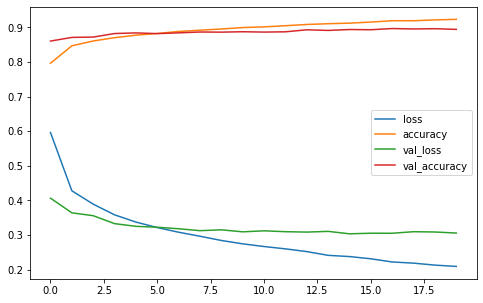

In [67]:
import pandas as pd 
import matplotlib as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
#plt.grid(True)
#plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
#plt.show()

In [68]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3428 - accuracy: 0.8814


[0.34282800555229187, 0.8813999891281128]

<AxesSubplot:>

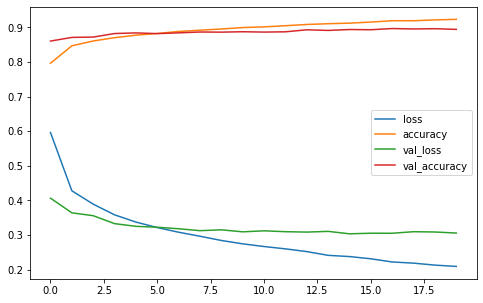

In [69]:
#100
pd.DataFrame(history.history).plot(figsize=(8, 5))

In [70]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3428 - accuracy: 0.8814


[0.34282800555229187, 0.8813999891281128]

<AxesSubplot:>

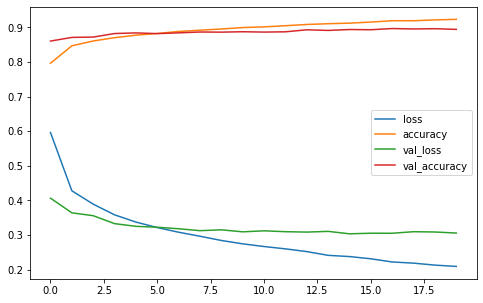

In [71]:
#50
pd.DataFrame(history.history).plot(figsize=(8, 5))


In [72]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3428 - accuracy: 0.8814


[0.34282800555229187, 0.8813999891281128]

# Regression MLP

In [73]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [74]:
housing=fetch_california_housing()
x_train_full ,x_test,y_train_full,y_test=train_test_split(housing.data,housing.target)

In [75]:
x_train,x_valid,y_train,y_valid=train_test_split(x_train_full,y_train_full)

In [76]:
scaler =StandardScaler()

In [77]:
x_train=scaler.fit_transform(x_train)
x_valid=scaler.fit_transform(x_valid)
x_test=scaler.fit_transform(x_test)

In [78]:
model=ks.models.Sequential([ks.layers.Dense(30, activation ="relu" ,input_shape=x_train.shape[1:]) ,  ks.layers.Dense(1)])

In [79]:
model.compile(loss="mean_squared_error", optimizer=ks.optimizers.SGD(learning_rate=1e-3))
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))
mse_test = model.evaluate(x_test, y_test)
X_new = x_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.6440 - val_loss: 0.8175
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7308 - val_loss: 0.6864
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6501 - val_loss: 0.6472
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6147 - val_loss: 0.6222
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5895 - val_loss: 0.5992
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5689 - val_loss: 0.5806
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5521 - val_loss: 0.5658
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5378 - val_loss: 0.5525
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5260 - val_loss: 0.5414
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5161 - val_loss: 0.5320

In [80]:
plt.plot(pd.DataFrame(history.history))

AttributeError: module 'matplotlib' has no attribute 'plot'

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))

In [ ]:
model.save("my_model.h5")

In [ ]:
model= ks.models.load_model("my_model.h5")

In [ ]:
model.predict(X_new)

In [ ]:
X_new

In [ ]:
x_test[0]

In [ ]:
model.compile(loss="mse", optimizer=ks.optimizers.SGD(learning_rate=1e-3))
ch=ks.callbacks.ModelCheckpoint("my_model.h5",save_best_only=True)
h1=model.fit(x_train,y_train, epochs=10 , validation_data=(x_valid,y_valid),callbacks=[ch])
model=ks.models.load_model("my_model.h5")




In [ ]:
mse_test = model.evaluate(x_test, y_test)

In [ ]:
model.compile(loss="mse", optimizer=ks.optimizers.SGD(learning_rate=1e-3))
es=ks.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
h1=model.fit(x_train,y_train, epochs=100 , validation_data=(x_valid,y_valid),callbacks=[ch,es])
model=ks.models.load_model("my_model.h5")

mse_test = model.evaluate(x_test, y_test)

In [ ]:
mse_test = model.evaluate(x_test, y_test)

In [ ]:
x_train.shape